In [20]:
pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/c7/ec/9dabb6a9abfdebb3c45b0cc52dec901caafef2b2c7e7d6a839ed86d81e91/opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata
  Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl (38.6 MB)
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Users\\Basuru Yasaruwan\\Contacts\\Desktop\\IPCV Practicals\\Practical 02 Vehical Number Plate\\IM01\\Lib\\site-packages\\cv2\\cv2.pyd'
Check the permissions.


[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\Basuru Yasaruwan\Contacts\Desktop\IPCV Practicals\Practical 02 Vehical Number Plate\IM01\Scripts\python.exe -m pip install --upgrade pip


In [21]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\Basuru Yasaruwan\Contacts\Desktop\IPCV Practicals\Practical 02 Vehical Number Plate\IM01\Scripts\python.exe -m pip install --upgrade pip


In [1]:
import cv2 # special package inside open CV 

In [2]:
cv2.__version__

'4.9.0'

In [3]:
import matplotlib.pyplot as plt

In [4]:
#mobile net is pzzzzzzza  re-trained model for image recognition and object analysis. It`s frozen model is avilable in public as a .pb 
# file. We have used that, as mentioned below. It required some additional configurations, which is provided by the pbtext file
config_file = r'C:\Users\Basuru Yasaruwan\Contacts\Desktop\IPCV Practicals\Practical 02 Vehical Number Plate\IM01\ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = r'C:\Users\Basuru Yasaruwan\Contacts\Desktop\IPCV Practicals\Practical 02 Vehical Number Plate\IM01\frozen_inference_graph.pb'


In [5]:
model=cv2.dnn_DetectionModel(frozen_model,config_file)

In [6]:
# class label file has been downloaded. This is used as enumerator to make the int output provided into text.
# currently, mobile net works for 80 classes. Though we add new classes for the label file, it will not work, hecnce the
# model is not trained
classLabels=[]
file_name=r"C:\Users\Basuru Yasaruwan\Contacts\Desktop\IPCV Practicals\Practical 02 Vehical Number Plate\IM01\Labels.txt"
with open (file_name,'rt') as fpt:
    classLabels=fpt.read().rstrip('\n').split('\n')

In [7]:
print(classLabels)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [8]:
# some adjustments are made to the input. Then the captured input will go through these adjustments. Becz, that1s how config
# file is organized and , once satisfying these adjusments only, the model can effectively asses the input images / videos
model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5,127.5,127.5))
model.setInputSwapRB(True)

< cv2.dnn.Model 0000021E4F39D110>

In [9]:
img=cv2.imread(r'C:\Users\Basuru Yasaruwan\Contacts\Desktop\IPCV Practicals\Practical 02 Vehical Number Plate\IM01\download 2.jpg')

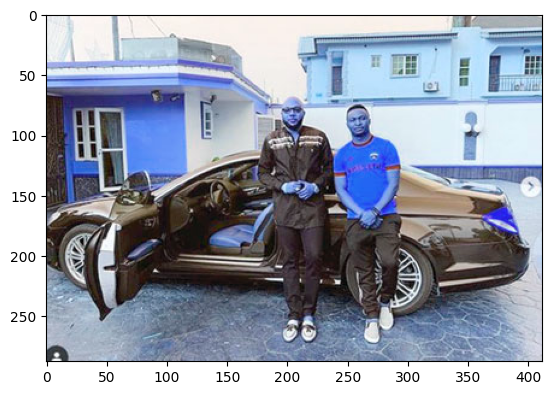

In [10]:
plt.imshow(img) # this is why we need pyplotlib

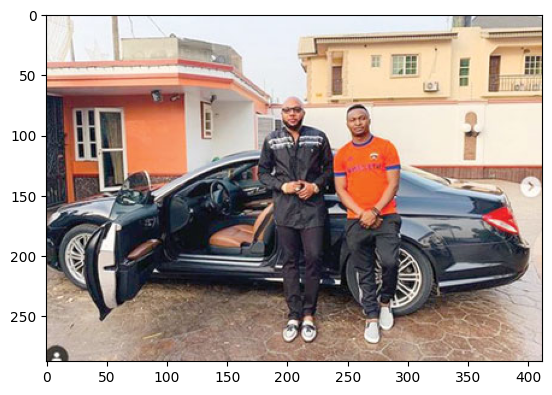

In [11]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)) # some color change filter

In [12]:
ClassIndex,confidence,bbox=model.detect(img,confThreshold=0.5) # if the detection confidence is more than 50% display the o/p

In [13]:
print(ClassIndex) # numerical predications of classes. Check with the class label list, strating from 1. Then, those are 
# man and car

[1 1 3]


In [14]:
font_scale=2
font=cv2.FONT_HERSHEY_PLAIN # bounding box text
for ClassInd,conf,boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
    # configuration of bounding box and associated text
    cv2.rectangle(img,boxes,(255,0,0),2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0),thickness=2)  

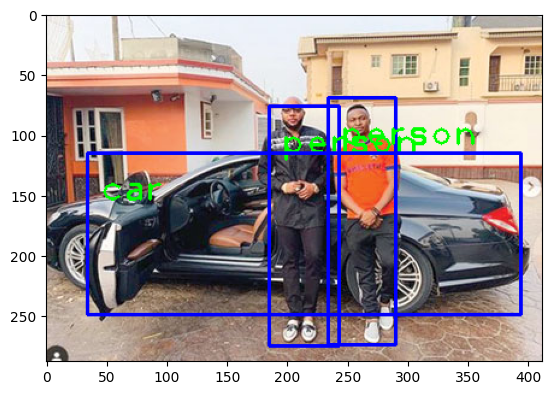

In [15]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [16]:
pip install IPython


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: C:\Users\Basuru Yasaruwan\Contacts\Desktop\IPCV Practicals\Practical 02 Vehical Number Plate\IM01\Scripts\python.exe -m pip install --upgrade pip


In [17]:
import cv2
from IPython.display import display, clear_output, Image
import PIL.Image

cap = cv2.VideoCapture(r'C:\Users\Basuru Yasaruwan\Contacts\Desktop\IPCV Practicals\Practical 02 Vehical Number Plate\IM01\video.mp4')

if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot Open Video / Web Cam")

font_scale = 2
font = cv2.FONT_HERSHEY_PLAIN

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Failed to capture frame")
            break

        ClassIndex, confidence, bbox = model.detect(frame, confThreshold=0.55)

        if len(ClassIndex) != 0:
            for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
                if ClassInd < 80:
                    cv2.rectangle(frame, boxes, (255, 0, 0), 2)
                    cv2.putText(frame, classLabels[ClassInd-1], (boxes[0]+10, boxes[1]+40),
                                font, fontScale=font_scale, color=(0, 255, 0), thickness=3)

        # Convert frame to RGB for IPython.display
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Display frame using IPython.display
        display(PIL.Image.fromarray(frame_rgb))

        # Clear the previous output for a smoother display
        clear_output(wait=True)

except KeyboardInterrupt:
    pass  # Handle keyboard interrupt (pressing 'q') to exit the loop

cap.release()
cv2.destroyAllWindows()


error: OpenCV(4.9.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1266: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'
